# Part II - (Loan Data from Prosper)
## by (Muhammad Tareq Mahmud)


## Investigation Overview


> This presentation is based on the dataset 'Loan Data from Prosper'. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This dataset will be used to answer certain questions like: What factors affect a loan’s outcome status? What affects the borrower’s APR or interest rate? Are there differences between loans depending on how large the original loan amount was?

The key insight of this dataset is:
 
Those who belong to the 'Employed' employment status earns more than any other employment status. And those whose income range is more than 100,000, their chance of getting the loan is higher than any other income range. One can assume the borrower rate based on the original loan amount. As the loan amount increases the borrower rate decreases. And at the same time, there is a positive correlation between Original loan amount and prosper score. With the increased prosper score the chance of getting a high first loan amount increases. Getting a loan is not depedent on wheher a brrower owns a house or nat rather it depends on prosper score, employment status and income range.It is surprising to see that the borrower with full time employment status are more inquired than the other employment status. And, the Loan Original Amount and Borrower Rate depend on the Borrower's prosper score


## Dataset Overview

> This data set contains 113,937 loans with 81 variables. I have not selected ahy specific variables to work with rather will be working with the entire dataset means 81 variables from the original dataset which contain 113937 rows. I am going work with the full dataset but there are certain columns which will be used frequently:
*'Term','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','ProsperScore','ListingCategory (numeric)','Occupation','EmploymentStatus','IsBorrowerHomeowner','CreditScoreRangeLower',
'CreditScoreRangeUpper','InquiriesLast6Months','TotalInquiries','IncomeRange','LoanOriginalAmount','MonthlyLoanPayment'*

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('loan.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> People, who are employed gets the loan most of the times followed by Full-time employment status. Interestingly, people with not-employment status get loans more than those who are retired or doing part-time jobs.
 

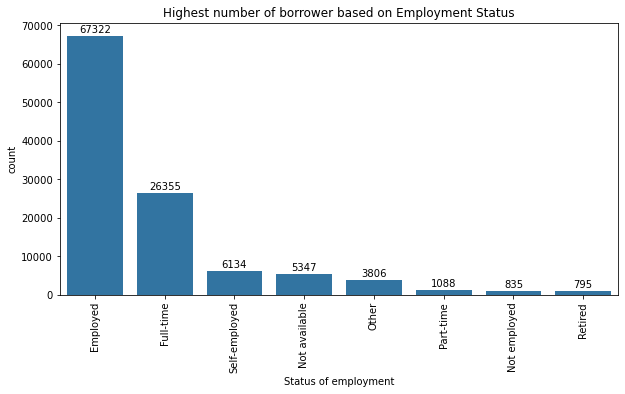

In [3]:
#  Which Employment status gets the loan most of the times?
def most_loans():
    '''
    This barchart is using the one column from the dataset: 'EmploymentStatus' to get an idea which employment status get the 
    loan most of the times.
    '''
    plt.figure(figsize=[10,5])
    order= df.EmploymentStatus.value_counts().index
    color=sb.color_palette()[0]
    sb.countplot(x=df.EmploymentStatus, order=order, color=color)
    values_status= df.EmploymentStatus.value_counts()
    plt.xticks(rotation=90)
    plt.xlabel('Status of employment')
    for i in range (values_status.shape[0]):
        count= values_status[i]
        plt.text(i,count+3000,count,va= 'top',ha= 'center')
    plt.show()
    
most_loans()

## (Visualization 2)

> The below displayed Boxplot is displaying the relation between the Income Range and Original Loan Amount. It projects that if the income range is more than or equal to $100,000 then the borrower gets the highest amount of loan (on an average). The overall boxplot is trying to depicts that how much a borrower will get as loan amount is dependent on his/her/their income range

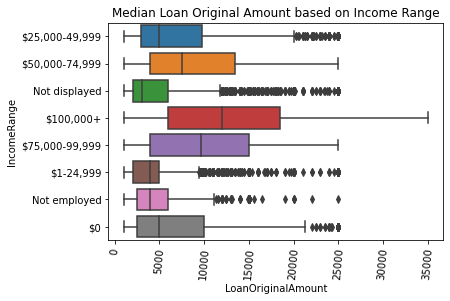

In [4]:
# use boxplot to display the highest mean amount of loan based on income range
def highest_mean_loan():
    '''
    To display the highest mean amount of original loan amount based on income range, I have used seaborn's boxplot 
    within which I have passed 'LoanOriginalAmount' column in the x-axis and 'IncomeRange' column in the y-axis. 
    '''
    sb.boxplot(data=df, y= 'IncomeRange',x= 'LoanOriginalAmount')
    plt.xticks(rotation=85);
highest_mean_loan()

## (Visualization 3)
> The above projected scatter plot displays that the more the propsper score the less the borrower rate. It can be said that the BorrowerRate is higly dependent on the ProsperScore.


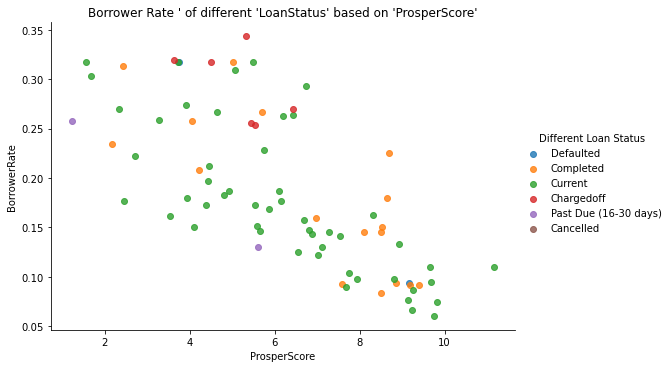

In [5]:
# display the distribution of the 'Borrower Rate ' of different 'LoanStatus' based on 'ProsperScore'
def lstatus_brate_pscore():
    '''
    To accomplish this task, I have used seaborn's FacetGrid's hue on the 'LoanStatus' column (categorical column type)
    and then used the map function of the facetgrid to apply the seaborn's regplot on 'ProsperScore' and 'BorrowerRate'
    with x_jitter to avoid overplotting. 
    '''
    sample= np.random.choice(df.shape[0],100,replace=False)
    sample_frame= df.loc[sample]
    a= sb.FacetGrid(data=sample_frame, hue= 'LoanStatus',size=5, aspect=1.5)
    a=a.map(sb.regplot,'ProsperScore','BorrowerRate', x_jitter=.9, fit_reg=False)
    a.add_legend(title='Different Loan Status');
    
lstatus_brate_pscore();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 657395 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\ASUS\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filen

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

In [1]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_I_exploration_template.ipynb to slides
[NbConvertApp] Writing 1460539 bytes to Part_I_exploration_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\ASUS\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_file

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
